<a href="https://colab.research.google.com/github/alfitranurr/DATA-MINING/blob/main/Tugas_1_(Data_Teks)_Modul_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Persiapan Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tabulate import tabulate
import emoji
import warnings
warnings.filterwarnings('ignore')

In [3]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
data = pd.read_csv('Tugas 1_NIM Genap_Modul 4.csv')

In [7]:
data.head()

,label,text
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...
1,FAKE,A four-minute-long video of a woman criticisin...
2,FAKE,"Republic Poll, a fake Twitter account imitatin..."
3,REAL,"Delhi teen finds place on UN green list, turns..."
4,REAL,Delhi: A high-level meeting underway at reside...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3729 entries, 0 to 3728
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   3729 non-null   object
 1   text    3721 non-null   object
dtypes: object(2)
memory usage: 58.4+ KB


# 2. Data Cleaning

In [8]:
def clean_text(text):
    text = str(text).lower()

    text = emoji.replace_emoji(text, replace='')

    text = text.replace('-', ' ')

    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    text = re.sub(r'\d+', '', text)

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    text = ' '.join(tokens)

    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [9]:
data['cleaned_text'] = data['text'].apply(clean_text)

In [15]:
data[['text', 'cleaned_text']].head()

,text,cleaned_text
0,Payal has accused filmmaker Anurag Kashyap of ...,payal accused filmmaker anurag kashyap behavin...
1,A four-minute-long video of a woman criticisin...,four minute long video woman criticising gover...
2,"Republic Poll, a fake Twitter account imitatin...",republic poll fake twitter account imitating a...
3,"Delhi teen finds place on UN green list, turns...",delhi teen finds place un green list turns gla...
4,Delhi: A high-level meeting underway at reside...,delhi high level meeting underway residence ra...


In [13]:
data = data.dropna(subset=['text'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3721 entries, 0 to 3728
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   label         3721 non-null   object
 1   text          3721 non-null   object
 2   cleaned_text  3721 non-null   object
dtypes: object(3)
memory usage: 116.3+ KB


# 3. Train Test Split

In [16]:
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])

In [18]:
data['label'].unique()

array(['REAL', 'FAKE'], dtype=object)

In [19]:
data['label_encoded'].unique()

array([1, 0])

In [22]:
for label, encoded_value in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{label}: {encoded_value}")

FAKE: 0
REAL: 1


In [23]:
X = data['cleaned_text']
y = data['label_encoded']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
print(f"Ukuran X_train: {X_train.shape}")

Ukuran X_train: (2976,)


In [26]:
print(f"Ukuran X_test: {X_test.shape}")

Ukuran X_test: (745,)


In [27]:
print(f"Distribusi label di y_train: {np.bincount(y_train)}")

Distribusi label di y_train: [1496 1480]


In [28]:
print(f"Distribusi label di y_test: {np.bincount(y_test)}")

Distribusi label di y_test: [375 370]


# 4. Vektorisasi Teks

In [29]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

In [30]:
X_train_tfidf = tfidf.fit_transform(X_train)

In [31]:
X_test_tfidf = tfidf.transform(X_test)

In [32]:
print(f"Bentuk X_train_tfidf: {X_train_tfidf.shape}")

Bentuk X_train_tfidf: (2976, 5000)


In [33]:
print(f"Bentuk X_test_tfidf: {X_test_tfidf.shape}")

Bentuk X_test_tfidf: (745, 5000)


In [ ]:
X_train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf.get_feature_names_out())
X_test_tfidf_df = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf.get_feature_names_out())

In [41]:
X_train_tfidf_df.head()

,aadmi,aadmi party,aaj,aaj tak,aakash,aakash chopra,aam,aam aadmi,aamir,aamir khan,...,youth congress,youtube,youtube channel,youtube channelall,youtube video,zayed,zayed stadium,zee,zee news,zindabad
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
X_test_tfidf_df.head()

,aadmi,aadmi party,aaj,aaj tak,aakash,aakash chopra,aam,aam aadmi,aamir,aamir khan,...,youth congress,youtube,youtube channel,youtube channelall,youtube video,zayed,zayed stadium,zee,zee news,zindabad
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 5. Model Naive Bayes

## Fitting Model

In [42]:
nb_model = MultinomialNB()

In [43]:
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

## Data Train Prediction

In [48]:
y_pred_train = nb_model.predict(X_train_tfidf)

In [49]:
accuracy_train = accuracy_score(y_train, y_pred_train)

In [51]:
print(f"Akurasi Naive Bayes (Data Train):: {accuracy_train:.4f}")

Akurasi Naive Bayes (Data Train):: 0.9546


## Data Test Prediction

In [52]:
y_pred_nb = nb_model.predict(X_test_tfidf)

In [53]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)

In [54]:
print(f"Akurasi Naive Bayes (Data Test): {accuracy_nb:.4f}")

Akurasi Naive Bayes (Data Test): 0.9530


## Classification Report (Naive Bayes)

In [81]:
print("\nClassification Report Naive Bayes:")
print(classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_))


Classification Report Naive Bayes:
              precision    recall  f1-score   support

        FAKE       0.91      1.00      0.95       376
        REAL       1.00      0.90      0.95       370

    accuracy                           0.95       746
   macro avg       0.96      0.95      0.95       746
weighted avg       0.95      0.95      0.95       746



## Confusion Matrix (Naive Bayes)

In [55]:
print("\nConfusion Matrix Naive Bayes:")
print(confusion_matrix(y_test, y_pred_nb))


Confusion Matrix Naive Bayes:
[[375   0]
 [ 35 335]]


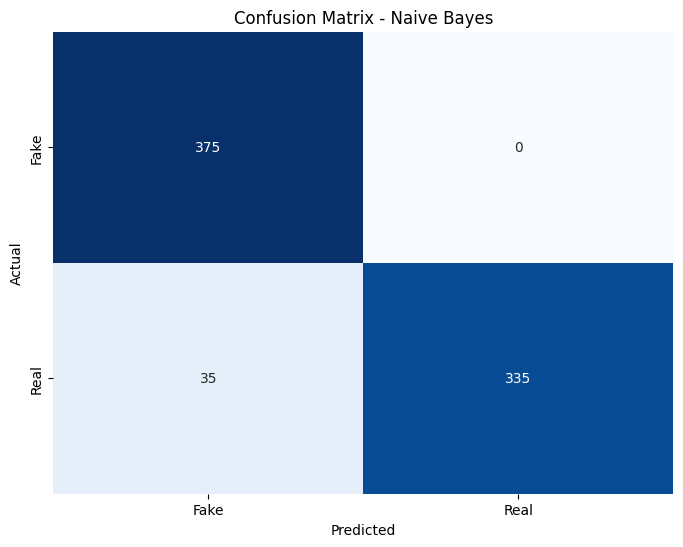

In [59]:
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Fake', 'Real'],  
            yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6. Model ANN

In [61]:
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

In [62]:
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [63]:
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Fitting Model

In [64]:
history = ann_model.fit(X_train_dense, y_train, epochs=10, batch_size=32,
                       validation_data=(X_test_dense, y_test), verbose=1)

Epoch 1/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8931 - loss: 0.4545 - val_accuracy: 0.9960 - val_loss: 0.0182
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9984 - loss: 0.0097 - val_accuracy: 0.9960 - val_loss: 0.0127
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9960 - val_loss: 0.0124
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 9.0430e-04 - val_accuracy: 0.9960 - val_loss: 0.0126
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 6.1950e-04 - val_accuracy: 0.9960 - val_loss: 0.0127
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 3.9419e-04 - val_accuracy: 0.9960 - val_loss: 0.0130
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 3.1174e-04 - val_accuracy: 0.9960 - val_loss: 0.0137
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 2.2721e-04 - val_accuracy

In [65]:
loss, accuracy_ann = ann_model.evaluate(X_test_dense, y_test)
print(f"Akurasi ANN: {accuracy_ann:.4f}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9938 - loss: 0.0233     
Akurasi ANN: 0.9960


In [66]:
y_pred_ann = (ann_model.predict(X_test_dense) > 0.5).astype(int)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


## Classification Report (ANN) 

In [67]:
print("\nClassification Report ANN:")
print(classification_report(y_test, y_pred_ann, target_names=label_encoder.classes_))


Classification Report ANN:
              precision    recall  f1-score   support

        FAKE       0.99      1.00      1.00       375
        REAL       1.00      0.99      1.00       370

    accuracy                           1.00       745
   macro avg       1.00      1.00      1.00       745
weighted avg       1.00      1.00      1.00       745



## Confusion Matrix (ANN)

In [68]:
print("\nConfusion Matrix ANN:")
print(confusion_matrix(y_test, y_pred_ann))


Confusion Matrix ANN:
[[374   1]
 [  2 368]]


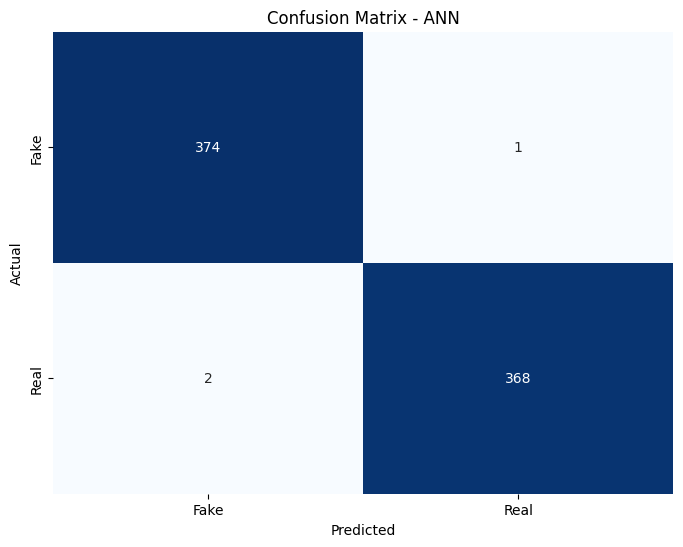

In [69]:
cm = confusion_matrix(y_test, y_pred_ann)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Fake', 'Real'], 
            yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix - ANN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 7. Perbandingan Akurasi

In [70]:
print("\nPerbandingan Akurasi:")
print(f"Akurasi Naive Bayes: {accuracy_nb:.4f}")
print(f"Akurasi ANN: {accuracy_ann:.4f}")
print(f"Perbedaan Akurasi (ANN - Naive Bayes): {(accuracy_ann - accuracy_nb):.4f}")


Perbandingan Akurasi:
Akurasi Naive Bayes: 0.9530
Akurasi ANN: 0.9960
Perbedaan Akurasi (ANN - Naive Bayes): 0.0430


In [71]:
best_model = "Naive Bayes" if accuracy_nb > accuracy_ann else "ANN"
print(f"Model terbaik berdasarkan akurasi: {best_model}")

Model terbaik berdasarkan akurasi: ANN


In [74]:
headers = ["Model", "Akurasi", "Perbedaan Akurasi (ANN - Naive Bayes)", "Model Terbaik"]

table_data = [
    ["Naive Bayes", f"{accuracy_nb:.4f}", f"{(accuracy_ann - accuracy_nb):.4f}", best_model if accuracy_nb > accuracy_ann else ""],
    ["ANN", f"{accuracy_ann:.4f}", f"{(accuracy_ann - accuracy_nb):.4f}", best_model if accuracy_ann >= accuracy_nb else ""]
]

In [75]:
print("\nTabel Perbandingan Akurasi:")
print(tabulate(table_data, headers=headers, tablefmt="grid"))


Tabel Perbandingan Akurasi:
+-------------+-----------+-----------------------------------------+-----------------+
| Model       |   Akurasi |   Perbedaan Akurasi (ANN - Naive Bayes) | Model Terbaik   |
+=============+===========+=========================================+=================+
| Naive Bayes |     0.953 |                                   0.043 |                 |
+-------------+-----------+-----------------------------------------+-----------------+
| ANN         |     0.996 |                                   0.043 | ANN             |
+-------------+-----------+-----------------------------------------+-----------------+


# 8. Cek Fitting

## Cek Fitting Naive Bayes

In [77]:
train_pred_nb = nb_model.predict(X_train_tfidf)
train_accuracy_nb = accuracy_score(y_train, train_pred_nb)
print(f"\nNaive Bayes - Akurasi Pelatihan: {train_accuracy_nb:.4f}")
print(f"Naive Bayes - Akurasi Pengujian: {accuracy_nb:.4f}")


Naive Bayes - Akurasi Pelatihan: 0.9546
Naive Bayes - Akurasi Pengujian: 0.9530


In [80]:
if train_accuracy_nb > accuracy_nb + 0.1:  
    nb_status = "Overfitting"
elif train_accuracy_nb < 0.7 and accuracy_nb < 0.7: 
    nb_status = "Underfitting"
else:
    nb_status = "Normal"

print(f"Status Naive Bayes: {nb_status}")

Status Naive Bayes: Normal


## Cek Fitting ANN

In [81]:
train_loss, train_accuracy_ann = ann_model.evaluate(X_train_dense, y_train, verbose=0)
print(f"\nANN - Akurasi Pelatihan: {train_accuracy_ann:.4f}")
print(f"ANN - Akurasi Pengujian: {accuracy_ann:.4f}")


ANN - Akurasi Pelatihan: 1.0000
ANN - Akurasi Pengujian: 0.9960


In [82]:
val_loss = history.history['val_loss']
train_loss_history = history.history['loss']
val_acc = history.history['val_accuracy']
train_acc = history.history['accuracy']

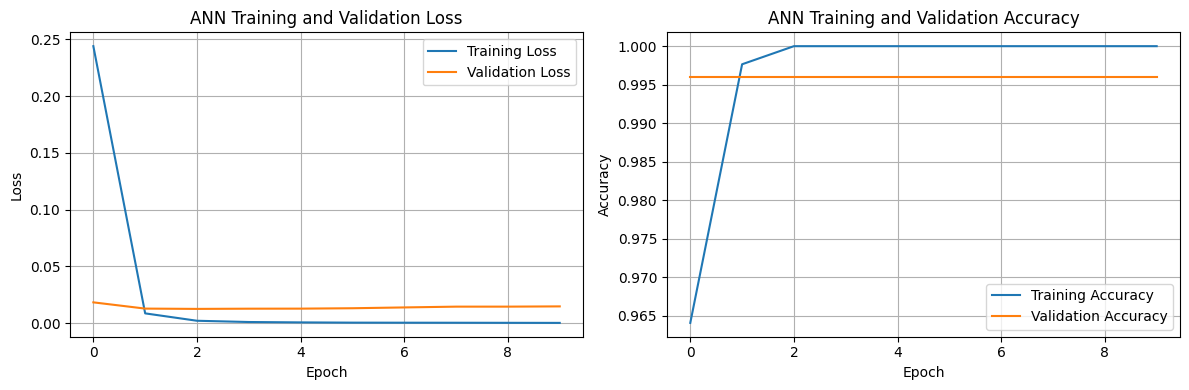

In [84]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('ANN Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('ANN Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('ann_training_history.png')
plt.show()
plt.close()

In [85]:
if train_accuracy_ann > accuracy_ann + 0.1 and val_loss[-1] > val_loss[0]: 
    ann_status = "Overfitting"
elif train_accuracy_ann < 0.7 and accuracy_ann < 0.7: 
    ann_status = "Underfitting"
else:
    ann_status = "Normal"

print(f"Status ANN: {ann_status}")

Status ANN: Normal


## Table Fitting Naive Bayes & ANN

In [86]:
fitting_headers = ["Model", "Akurasi Pelatihan", "Akurasi Pengujian", "Status"]

fitting_table = [
    ["Naive Bayes", f"{train_accuracy_nb:.4f}", f"{accuracy_nb:.4f}", nb_status],
    ["ANN", f"{train_accuracy_ann:.4f}", f"{accuracy_ann:.4f}", ann_status]
]

In [87]:
print("\nTabel Status Fitting:")
print(tabulate(fitting_table, headers=fitting_headers, tablefmt="grid"))


Tabel Status Fitting:
+-------------+---------------------+---------------------+----------+
| Model       |   Akurasi Pelatihan |   Akurasi Pengujian | Status   |
+=============+=====================+=====================+==========+
| Naive Bayes |              0.9546 |               0.953 | Normal   |
+-------------+---------------------+---------------------+----------+
| ANN         |              1      |               0.996 | Normal   |
+-------------+---------------------+---------------------+----------+


# 9. Contoh Prediksi

In [88]:
sample_text = "A viral video claims that the government is hiding the truth about a new disease outbreak in the capital."

In [89]:
cleaned_sample = clean_text(sample_text)

In [90]:
sample_tfidf = tfidf.transform([cleaned_sample])
sample_tfidf_dense = sample_tfidf.toarray()

## Naive Bayes

In [91]:
prediction_nb = nb_model.predict(sample_tfidf)
predicted_label_nb = label_encoder.inverse_transform(prediction_nb)[0]

## ANN

In [92]:
prediction_ann = (ann_model.predict(sample_tfidf_dense) > 0.5).astype(int)
predicted_label_ann = label_encoder.inverse_transform(prediction_ann.flatten())[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


## Analisa Pembuktian

In [93]:
print("\nContoh Prediksi:")
print(f"Teks: {sample_text}")
print(f"Prediksi Naive Bayes: {predicted_label_nb}")
print(f"Prediksi ANN: {predicted_label_ann}")


Contoh Prediksi:
Teks: A viral video claims that the government is hiding the truth about a new disease outbreak in the capital.
Prediksi Naive Bayes: FAKE
Prediksi ANN: FAKE


# Save The Model

## Naive Bayes

In [94]:
import joblib

joblib.dump(nb_model, 'naive_bayes_model.pkl')
print("Model Naive Bayes berhasil disimpan.")


Model Naive Bayes berhasil disimpan.


## ANN

In [97]:
from tensorflow.keras.models import save_model

ann_model.save('ann_model.keras')
print("Model ANN berhasil disimpan dalam format Keras.")

Model ANN berhasil disimpan dalam format Keras.


# Load The Model

## Naive Bayes

In [98]:
nb_model_loaded = joblib.load('naive_bayes_model.pkl')
print("Model Naive Bayes berhasil dimuat.")

Model Naive Bayes berhasil dimuat.


## ANN

In [99]:
from tensorflow.keras.models import load_model

ann_model_loaded = load_model('ann_model.keras')
print("Model ANN berhasil dimuat.")

Model ANN berhasil dimuat.
